<a href="https://colab.research.google.com/github/z-gard/analysis/blob/main/notebooks/geographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -q geocoder
!pip install -q --upgrade xlrd
!pip install -q japanize-matplotlib

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.1 MB 7.3 MB/s 


In [42]:
import requests
import json
import pandas as pd
from urllib.parse import urlparse
import geocoder
import math
import io
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
def get_data_csv_url(url, encoding='utf-8', excel=False):
    res = requests.get(url)
    if res.status_code == 200:
        if not excel:
            return pd.read_csv(io.BytesIO(res.content), encoding=encoding)
        else:
            return pd.read_excel(io.BytesIO(res.content))
    else:
        raise Exception(f'status_code: {res.status_code} ({url})')

In [4]:
def number_to_kanji(str):
    return str.translate(str.maketrans({'Ôºë':'‰∏Ä', 'Ôºí':'‰∫å', 'Ôºì':'‰∏â', 'Ôºî':'Âõõ', 'Ôºï':'‰∫î', 'Ôºñ':'ÂÖ≠', 'Ôºó':'‰∏É', 'Ôºò':'ÂÖ´', 'Ôºô':'‰πù'}))

In [5]:
def add_pref_district(df_data, district, is_master=False):
    df_data['ÈÉΩÈÅìÂ∫úÁúå'] = 'Êù±‰∫¨ÈÉΩ'
    df_data['Â∏ÇÂå∫Áî∫Êùë'] = district
    if is_master:
        df_data['Áî∫‰∏ÅÁõÆ'] = df_data['Áî∫‰∏ÅÁõÆ'].apply(number_to_kanji)
        df_data['Áî∫Âêç'] = df_data['Áî∫‰∏ÅÁõÆ'].str.replace('[‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅ]‰∏ÅÁõÆ', '', regex=True)

### Ê∏ØÂå∫„Éû„Çπ„Çø„Éº

In [6]:
minato_master_url = 'https://opendata.city.minato.tokyo.jp/dataset/213a32cd-85de-4c30-aaf9-7164c5bf06c9/resource/bc0beb3f-ca1d-45a3-87ea-8e190bb34d27/download/chomokubetsu_2022.csv'
df_minato_master = get_data_csv_url(minato_master_url)
df_minato_master = df_minato_master.dropna(subset=['‰∫∫Âè£ÂêàË®àÔºª‰∫∫ÔºΩ'])
add_pref_district(df_minato_master, 'Ê∏ØÂå∫', True)
df_minato_master = df_minato_master.sort_values('Âπ¥ÊúàÊó•ÔºªË•øÊö¶ÔºΩ', ascending=False).drop_duplicates(subset=['Áî∫‰∏ÅÁõÆ'])
df_minato_master = df_minato_master.drop(columns=['Âπ¥ÊúàÊó•ÔºªË•øÊö¶ÔºΩ'])
df_minato_master = df_minato_master.sort_values('Áî∫‰∏ÅÁõÆ').reset_index(drop=True)
df_minato_master.rename(columns={'‰∫∫Âè£Áî∑Ôºª‰∫∫ÔºΩ': '‰∫∫Âè£Áî∑', '‰∫∫Âè£Â•≥Ôºª‰∫∫ÔºΩ': '‰∫∫Âè£Â•≥', '‰∫∫Âè£ÂêàË®àÔºª‰∫∫ÔºΩ': '‰∫∫Âè£ÂêàË®à'}, inplace=True)
df_minato_master.drop(columns=['Âú∞Âå∫'], inplace=True)
print(df_minato_master.shape)

(117, 8)


In [7]:
df_minato_master.head()

Áî∫‰∏ÅÁõÆ     ‰∏ñÂ∏ØÊï∞     ‰∫∫Âè£Áî∑     ‰∫∫Âè£Â•≥    ‰∫∫Âè£ÂêàË®à ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë  Áî∫Âêç
0  ‰∏âÁî∞‰∏Ä‰∏ÅÁõÆ  2269.0  1818.0  2177.0  3995.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞
1  ‰∏âÁî∞‰∏â‰∏ÅÁõÆ  1083.0   803.0   866.0  1669.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞
2  ‰∏âÁî∞‰∫å‰∏ÅÁõÆ  2406.0  2033.0  2481.0  4514.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞
3  ‰∏âÁî∞‰∫î‰∏ÅÁõÆ  3606.0  2922.0  3622.0  6544.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞
4  ‰∏âÁî∞Âõõ‰∏ÅÁõÆ  2020.0  1612.0  1966.0  3578.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞

### Â¢®Áî∞Âå∫„Éû„Çπ„Çø„Éº

In [8]:
sumida_master_url = 'https://www.city.sumida.lg.jp/kuseijoho/sumida_info/opendata/opendata_ichiran/population_data/setai_all_data.files/setai_all_2208.csv'
df_sumida_master = get_data_csv_url(sumida_master_url, 'shift-jis')
add_pref_district(df_sumida_master, 'Â¢®Áî∞Âå∫', True)
df_sumida_master = df_sumida_master.sort_values('Áî∫‰∏ÅÁõÆ').reset_index(drop=True)
df_sumida_master.rename(columns={'‰∏ñÂ∏ØÊï∞[‰∏ñÂ∏Ø]': '‰∏ñÂ∏ØÊï∞', 'Áî∑[‰∫∫]': '‰∫∫Âè£Áî∑', 'Â•≥[‰∫∫]': '‰∫∫Âè£Â•≥', 'Á∑èÊï∞[‰∫∫]': '‰∫∫Âè£ÂêàË®à'}, inplace=True)
print(df_sumida_master.shape)

(104, 8)


In [9]:
df_sumida_master.head()

Áî∫‰∏ÅÁõÆ   ‰∏ñÂ∏ØÊï∞   ‰∫∫Âè£Áî∑   ‰∫∫Âè£Â•≥  ‰∫∫Âè£ÂêàË®à ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë  Áî∫Âêç
0  ‰∏°ÂõΩ‰∏Ä‰∏ÅÁõÆ  1206   888   884  1772  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  ‰∏°ÂõΩ
1  ‰∏°ÂõΩ‰∏â‰∏ÅÁõÆ  1396  1016  1021  2037  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  ‰∏°ÂõΩ
2  ‰∏°ÂõΩ‰∫å‰∏ÅÁõÆ  1422  1065  1112  2177  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  ‰∏°ÂõΩ
3  ‰∏°ÂõΩÂõõ‰∏ÅÁõÆ  1405  1093  1087  2180  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  ‰∏°ÂõΩ
4  ‰∫ÄÊ≤¢‰∏Ä‰∏ÅÁõÆ  1290  1031  1099  2130  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  ‰∫ÄÊ≤¢

### Á∑¥È¶¨Âå∫„Éû„Çπ„Çø„Éº

In [10]:
nerima_master_url = 'https://www.city.nerima.tokyo.jp/kusei/tokei/opendata/opendatasite/tokei_kusei/chouchoubetu.files/202207chouchoubetu.csv'
df_nerima_master = get_data_csv_url(nerima_master_url, 'shift-jis')
add_pref_district(df_nerima_master, 'Á∑¥È¶¨Âå∫', True)
df_nerima_master = df_nerima_master[df_nerima_master['Áî∫‰∏ÅÁõÆ'].str.contains('‰∏ÅÁõÆ')]
df_nerima_master.rename(columns={'‰∏ñÂ∏ØÊï∞[‰∏ñÂ∏Ø]': '‰∏ñÂ∏ØÊï∞', '‰∫∫Âè£ÔºàÁî∑Ôºâ[‰∫∫]': '‰∫∫Âè£Áî∑', '‰∫∫Âè£ÔºàÂ•≥Ôºâ[‰∫∫]': '‰∫∫Âè£Â•≥', 'Ë®à[‰∫∫]': '‰∫∫Âè£ÂêàË®à'}, inplace=True)
print(df_nerima_master.shape)

(198, 8)


In [11]:
df_nerima_master.head()

Áî∫‰∏ÅÁõÆ   ‰∏ñÂ∏ØÊï∞   ‰∫∫Âè£Áî∑   ‰∫∫Âè£Â•≥  ‰∫∫Âè£ÂêàË®à ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë   Áî∫Âêç
2   Êó≠‰∏ò‰∏Ä‰∏ÅÁõÆ  3350  2478  2392  4870  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫   Êó≠‰∏ò
3   Êó≠‰∏ò‰∫å‰∏ÅÁõÆ  1552  1179  1268  2447  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫   Êó≠‰∏ò
5  Â∞èÁ´πÁî∫‰∏Ä‰∏ÅÁõÆ  3137  2491  2703  5194  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫  Â∞èÁ´πÁî∫
6  Â∞èÁ´πÁî∫‰∫å‰∏ÅÁõÆ  2596  2034  2315  4349  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫  Â∞èÁ´πÁî∫
9   ÁæΩÊ≤¢‰∏Ä‰∏ÅÁõÆ   927   672   697  1369  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫   ÁæΩÊ≤¢

### Âè∞Êù±Âå∫„Éû„Çπ„Çø„Éº

In [12]:
taito_master_url = 'https://www.city.taito.lg.jp/kusei/shokai/tokei/setai/setaisu/r04chocho.files/Z_cho0408.csv'
df_taito_master = get_data_csv_url(taito_master_url, 'shift-jis')
df_taito_master = df_taito_master[df_taito_master['Áî∫Âêç'] != 'Á∑èÊï∞'].rename(columns={'Áî∫Âêç': 'Áî∫‰∏ÅÁõÆ'})
add_pref_district(df_taito_master, 'Âè∞Êù±Âå∫', True)
df_taito_master['‰∫∫Âè£Áî∑'] = df_taito_master['‰∫∫Âè£„ÄÄÁî∑„ÄÄÊó•Êú¨‰∫∫'].str.replace(',', '').astype(int) + df_taito_master['‰∫∫Âè£„ÄÄÁî∑„ÄÄÂ§ñÂõΩ‰∫∫'].str.replace(',', '').astype(int)
df_taito_master['‰∫∫Âè£Â•≥'] = df_taito_master['‰∫∫Âè£„ÄÄÂ•≥„ÄÄÊó•Êú¨‰∫∫'].str.replace(',', '').astype(int) + df_taito_master['‰∫∫Âè£„ÄÄÂ•≥„ÄÄÂ§ñÂõΩ‰∫∫'].str.replace(',', '').astype(int)
df_taito_master['‰∏ñÂ∏ØÊï∞'] = df_taito_master['‰∏ñÂ∏ØÊï∞„ÄÄË®à'].str.replace(',', '').astype(int)
df_taito_master['‰∫∫Âè£ÂêàË®à'] = df_taito_master['‰∫∫Âè£„ÄÄÁî∑Â•≥Ë®à„ÄÄË®à'].str.replace(',', '').astype(int)
df_taito_master = df_taito_master[['Áî∫‰∏ÅÁõÆ', 'Áî∫Âêç', 'ÈÉΩÈÅìÂ∫úÁúå', 'Â∏ÇÂå∫Áî∫Êùë', '‰∏ñÂ∏ØÊï∞', '‰∫∫Âè£Áî∑', '‰∫∫Âè£Â•≥', '‰∫∫Âè£ÂêàË®à']]
print(df_taito_master.shape)

(108, 8)


In [13]:
df_taito_master.head()

Áî∫‰∏ÅÁõÆ  Áî∫Âêç ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë   ‰∏ñÂ∏ØÊï∞   ‰∫∫Âè£Áî∑   ‰∫∫Âè£Â•≥  ‰∫∫Âè£ÂêàË®à
1  Âè∞Êù±‰∏Ä‰∏ÅÁõÆ  Âè∞Êù±  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  1478  1291   960  2251
2  Âè∞Êù±‰∫å‰∏ÅÁõÆ  Âè∞Êù±  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  1544  1245  1112  2357
3  Âè∞Êù±‰∏â‰∏ÅÁõÆ  Âè∞Êù±  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  1887  1495  1441  2936
4  Âè∞Êù±Âõõ‰∏ÅÁõÆ  Âè∞Êù±  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  1036   860   765  1625
5  Êü≥Ê©ã‰∏Ä‰∏ÅÁõÆ  Êü≥Ê©ã  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫   925   731   652  1383

### Áî∫‰∏Å„Éû„Çπ„Çø„Éº„Éá„Éº„Çø

In [14]:
df_tokyo_district_master = pd.concat([
    df_minato_master,
    df_sumida_master,
    df_nerima_master,
    df_taito_master,
]).reset_index(drop=True)
print(df_tokyo_district_master.shape)

(527, 8)


In [15]:
def add_lat_lon(df_master):
    lats = []
    lons = []
    for i, row in df_master.iterrows():
        ret = geocoder.osm(row['ÈÉΩÈÅìÂ∫úÁúå'] + row['Â∏ÇÂå∫Áî∫Êùë'] + row['Áî∫‰∏ÅÁõÆ'], timeout=5)
        if not ret.ok:
            print(i, row['Â∏ÇÂå∫Áî∫Êùë'], row['Áî∫‰∏ÅÁõÆ'])
        lats.append(ret.lat)
        lons.append(ret.lng)
    df_copy = df_master.copy()
    df_copy['Á∑ØÂ∫¶'] = lats
    df_copy['ÁµåÂ∫¶'] = lons
    return df_copy

In [16]:
%%time
df_tokyo_district_master = add_lat_lon(df_tokyo_district_master)

218 Â¢®Áî∞Âå∫ Èå¶Á≥∏‰∏â‰∏ÅÁõÆ
CPU times: user 8.49 s, sys: 575 ms, total: 9.07 s
Wall time: 4min 24s


In [17]:
df_tokyo_district_master.head()

Áî∫‰∏ÅÁõÆ     ‰∏ñÂ∏ØÊï∞     ‰∫∫Âè£Áî∑     ‰∫∫Âè£Â•≥    ‰∫∫Âè£ÂêàË®à ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë  Áî∫Âêç         Á∑ØÂ∫¶          ÁµåÂ∫¶
0  ‰∏âÁî∞‰∏Ä‰∏ÅÁõÆ  2269.0  1818.0  2177.0  3995.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞  35.653750  139.741676
1  ‰∏âÁî∞‰∏â‰∏ÅÁõÆ  1083.0   803.0   866.0  1669.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞  35.643955  139.743205
2  ‰∏âÁî∞‰∫å‰∏ÅÁõÆ  2406.0  2033.0  2481.0  4514.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞  35.649845  139.741681
3  ‰∏âÁî∞‰∫î‰∏ÅÁõÆ  3606.0  2922.0  3622.0  6544.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞  35.646272  139.738259
4  ‰∏âÁî∞Âõõ‰∏ÅÁõÆ  2020.0  1612.0  1966.0  3578.0  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  ‰∏âÁî∞  35.643942  139.739434

## Âõ≥Êõ∏È§®

In [18]:
library_columns = ['ÊñΩË®≠ÂàÜÈ°û', 'ÊñΩË®≠Âêç', 'ÈÉΩÈÅìÂ∫úÁúå', 'Â∏ÇÂå∫Áî∫Êùë', 'ÊâÄÂú®Âú∞', 'Á∑ØÂ∫¶', 'ÁµåÂ∫¶']

### Ê∏ØÂå∫

In [19]:
minato_library_url = 'https://opendata.city.minato.tokyo.jp/dataset/52105970-c407-423c-8827-2cfc229bf864/resource/dc824430-1645-45f6-8dc1-229b2d2c97a2/download/minatokushisetsujoho_tosyokan.csv'
df_minato_library = get_data_csv_url(minato_library_url)
add_pref_district(df_minato_library, 'Ê∏ØÂå∫')
df_minato_library = df_minato_library[df_minato_library['Á¨¨2ÂàÜÈ°û'] == 'Âõ≥Êõ∏È§®'].reset_index(drop=False)
df_minato_library = df_minato_library.rename(columns={'Á¨¨2ÂàÜÈ°û':'ÊñΩË®≠ÂàÜÈ°û', '„Éö„Éº„Ç∏„Çø„Ç§„Éà„É´':'ÊñΩË®≠Âêç'})[library_columns]
print(df_minato_library.shape)

(7, 7)


In [20]:
df_minato_library

ÊñΩË®≠ÂàÜÈ°û      ÊñΩË®≠Âêç ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë                           ÊâÄÂú®Âú∞         Á∑ØÂ∫¶          ÁµåÂ∫¶
0  Âõ≥Êõ∏È§®   „Åø„Å™„Å®Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫                 Ê∏ØÂå∫ËäùÂÖ¨Âúí‰∏â‰∏ÅÁõÆ2Áï™25Âè∑  35.660020  139.750171
1  Âõ≥Êõ∏È§®    ‰∏âÁî∞Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫      Ê∏ØÂå∫Ëäù‰∫î‰∏ÅÁõÆ36Áï™4Âè∑„ÄÄÊú≠„ÅÆËæª„Çπ„ÇØ„Ç®„Ç¢4ÈöéÔΩû6Èöé  35.647149  139.745214
2  Âõ≥Êõ∏È§®    È∫ªÂ∏ÉÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫                Ê∏ØÂå∫ÂÖ≠Êú¨Êú®‰∫î‰∏ÅÁõÆ12Áï™24Âè∑  35.657508  139.735818
3  Âõ≥Êõ∏È§®    Ëµ§ÂùÇÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫       Ê∏ØÂå∫ÂçóÈùíÂ±±‰∏Ä‰∏ÅÁõÆ3Áï™3Âè∑„ÄÄÈùíÂ±±‰∏Ä‰∏ÅÁõÆ„Çø„ÉØ„Éº3Èöé  35.671596  139.725328
4  Âõ≥Êõ∏È§®    È´òËº™Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  Ê∏ØÂå∫È´òËº™‰∏Ä‰∏ÅÁõÆ16Áï™25Âè∑„ÄÄÈ´òËº™„Ç≥„Éü„É•„Éã„ÉÜ„Ç£„Éº„Å∑„Çâ„Åñ3Èöé  35.642079  139.734035
5  Âõ≥Êõ∏È§®    Ê∏ØÂçóÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫       Ê∏ØÂå∫Ê∏ØÂçó‰∏â‰∏ÅÁõÆ3Áï™17Âè∑„ÄÄ„Ç∑„ÉÜ„Ç£„Éè„Ç§„ÉÑÊ∏ØÂçó1Èöé  35.633141  139.749575
6  Âõ≥Êõ∏È§®  È´òËº™Âõ≥Êõ∏È§®ÂàÜÂÆ§  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫    Ê∏ØÂå∫È´òËº™‰∏Ä‰∏ÅÁõÆ4Áï™35Âè∑„ÄÄÈ´òËº™Â≠ê„Å©„ÇÇ‰∏≠È´òÁîü„Éó„É©„Ç∂3Èöé  35.642412  139.734855

### Â¢®Áî∞Âå∫

In [21]:
sumida_library_url = 'https://www.city.sumida.lg.jp/kuseijoho/sumida_info/opendata/opendata_ichiran/shisetsu_data.files/library.csv'
df_sumida_library = get_data_csv_url(sumida_library_url, 'shift-jis')
add_pref_district(df_sumida_library, 'Â¢®Áî∞Âå∫')
df_sumida_library['ÊñΩË®≠ÂàÜÈ°û'] = 'Âõ≥Êõ∏È§®'
df_sumida_library = df_sumida_library.rename(columns={'ÊñΩË®≠ÂêçÁß∞':'ÊñΩË®≠Âêç'})[library_columns]
print(df_sumida_library.shape)

(7, 7)


In [22]:
df_sumida_library

ÊñΩË®≠ÂàÜÈ°û             ÊñΩË®≠Âêç ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë                 ÊâÄÂú®Âú∞         Á∑ØÂ∫¶          ÁµåÂ∫¶
0  Âõ≥Êõ∏È§®         „Å≤„Åç„Åµ„Å≠Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫       Â¢®Áî∞Âå∫‰∫¨Â≥∂‰∏Ä‰∏ÅÁõÆ36Áï™5Âè∑  35.717058  139.819491
1  Âõ≥Êõ∏È§®            Á∑ëÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫        Â¢®Áî∞Âå∫Á∑ë‰∫å‰∏ÅÁõÆ24Áï™5Âè∑  35.695740  139.800613
2  Âõ≥Êõ∏È§®           Á´ãËä±Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫   Â¢®Áî∞Âå∫Á´ãËä±ÂÖ≠‰∏ÅÁõÆ8Áï™1Âè∑101Âè∑ÂÆ§  35.710694  139.834842
3  Âõ≥Êõ∏È§®           ÂÖ´Â∫ÉÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫  Â¢®Áî∞Âå∫ÂÖ´Â∫É‰∫î‰∏ÅÁõÆ10Áï™1Âè∑104Âè∑ÂÆ§  35.724810  139.825793
4  Âõ≥Êõ∏È§®  Êù±ÈßíÂΩ¢„Ç≥„Éü„É•„Éã„ÉÜ„Ç£‰ºöÈ§®Âõ≥Êõ∏ÂÆ§  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫      Â¢®Áî∞Âå∫Êù±ÈßíÂΩ¢Âõõ‰∏ÅÁõÆ14Áï™1Âè∑  35.705517  139.807746
5  Âõ≥Êõ∏È§®  Ê¢ÖËã•Ê©ã„Ç≥„Éü„É•„Éã„ÉÜ„Ç£‰ºöÈ§®Âõ≥Êõ∏ÂÆ§  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫        Â¢®Áî∞Âå∫Â†§ÈÄö‰∫å‰∏ÅÁõÆ9Áï™1Âè∑  35.735335  139.816746
6  Âõ≥Êõ∏È§®   Ê®™Â∑ù„Ç≥„Éü„É•„Éã„ÉÜ„Ç£‰ºöÈ§®Âõ≥Êõ∏ÂÆ§  Êù±‰∫¨ÈÉΩ  Â¢®Áî∞Âå∫        Â¢®Áî∞Âå∫Ê®™Â∑ù‰∫î‰∏ÅÁõÆ9Áï™1Âè∑  35.705116  139.817580

### Á∑¥È¶¨Âå∫

In [23]:
nerima_library_url = 'https://www.city.nerima.tokyo.jp/kusei/tokei/opendata/opendatasite/sisetsujyouhou/toshokan.files/toshokan.csv'
df_nerima_library = get_data_csv_url(nerima_library_url, 'shift-jis')
add_pref_district(df_nerima_library, 'Á∑¥È¶¨Âå∫')
df_nerima_library = df_nerima_library[~df_nerima_library['ÂêçÁß∞'].str.contains('ÂèóÂèñÁ™ìÂè£')].reset_index(drop=True)
df_nerima_library['ÊñΩË®≠ÂàÜÈ°û'] = 'Âõ≥Êõ∏È§®'
df_nerima_library = df_nerima_library.rename(columns={'ÂêçÁß∞':'ÊñΩË®≠Âêç'})[library_columns]
print(df_nerima_library.shape)

(13, 7)


In [24]:
df_nerima_library.head()

ÊñΩË®≠ÂàÜÈ°û     ÊñΩË®≠Âêç ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë               ÊâÄÂú®Âú∞         Á∑ØÂ∫¶          ÁµåÂ∫¶
0  Âõ≥Êõ∏È§®   Â∞èÁ´πÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫      Á∑¥È¶¨Âå∫Â∞èÁ´πÁî∫2-43-1  35.741905  139.675992
1  Âõ≥Êõ∏È§®   Á∑¥È¶¨Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫       Á∑¥È¶¨Âå∫Ë±äÁéâÂåó6-8-1  35.734021  139.652060
2  Âõ≥Êõ∏È§®   Ë≤´‰∫ïÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫      Á∑¥È¶¨Âå∫Ë≤´‰∫ï1-36-16  35.737000  139.635924
3  Âõ≥Êõ∏È§®  Âπ≥ÂíåÂè∞Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫     Á∑¥È¶¨Âå∫Âπ≥ÂíåÂè∞1-36-17  35.760001  139.664822
4  Âõ≥Êõ∏È§®  Êò•Êó•Áî∫Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ  Á∑¥È¶¨Âå∫  Á∑¥È¶¨Âå∫Êò•Êó•Áî∫5-31-2-201  35.751298  139.639314

### Âõ≥Êõ∏È§®„Éû„Çπ„Çø„Éº

In [25]:
df_library_master = pd.concat([
    df_minato_library,
    df_sumida_library,
    df_nerima_library,
]).reset_index(drop=True)
print(df_library_master.shape)

(27, 7)


In [26]:
df_library_master.head()

ÊñΩË®≠ÂàÜÈ°û     ÊñΩË®≠Âêç ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë                           ÊâÄÂú®Âú∞         Á∑ØÂ∫¶          ÁµåÂ∫¶
0  Âõ≥Êõ∏È§®  „Åø„Å™„Å®Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫                 Ê∏ØÂå∫ËäùÂÖ¨Âúí‰∏â‰∏ÅÁõÆ2Áï™25Âè∑  35.660020  139.750171
1  Âõ≥Êõ∏È§®   ‰∏âÁî∞Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫      Ê∏ØÂå∫Ëäù‰∫î‰∏ÅÁõÆ36Áï™4Âè∑„ÄÄÊú≠„ÅÆËæª„Çπ„ÇØ„Ç®„Ç¢4ÈöéÔΩû6Èöé  35.647149  139.745214
2  Âõ≥Êõ∏È§®   È∫ªÂ∏ÉÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫                Ê∏ØÂå∫ÂÖ≠Êú¨Êú®‰∫î‰∏ÅÁõÆ12Áï™24Âè∑  35.657508  139.735818
3  Âõ≥Êõ∏È§®   Ëµ§ÂùÇÂõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫       Ê∏ØÂå∫ÂçóÈùíÂ±±‰∏Ä‰∏ÅÁõÆ3Áï™3Âè∑„ÄÄÈùíÂ±±‰∏Ä‰∏ÅÁõÆ„Çø„ÉØ„Éº3Èöé  35.671596  139.725328
4  Âõ≥Êõ∏È§®   È´òËº™Âõ≥Êõ∏È§®  Êù±‰∫¨ÈÉΩ   Ê∏ØÂå∫  Ê∏ØÂå∫È´òËº™‰∏Ä‰∏ÅÁõÆ16Áï™25Âè∑„ÄÄÈ´òËº™„Ç≥„Éü„É•„Éã„ÉÜ„Ç£„Éº„Å∑„Çâ„Åñ3Èöé  35.642079  139.734035

## Ë∑ùÈõ¢„É¨„Éô„É´Ë®àÁÆó

In [27]:
# distance = 6371*ùëéùëüùëêùëêùëúùë†(ùëêùëúùë†(ùëôùëéùë°1)*ùëêùëúùë†(ùëôùëéùë°2)*ùëêùëúùë†(ùëôùëúùëõ2‚àíùëôùëúùëõ1)+ùë†ùëñùëõ(ùëôùëéùë°1)*ùë†ùëñùëõ(ùëôùëéùë°2))

def get_distance(lat1, lon1, lat2, lon2):
    _lat1 = lat1 * math.pi / 180
    _lon1 = lon1 * math.pi / 180
    _lat2 = lat2 * math.pi / 180
    _lon2 = lon2 * math.pi / 180
    _tmp = math.cos(_lat1) * math.cos(_lat2) * math.cos(_lon2 - _lon1) + math.sin(_lat1) * math.sin(_lat2)
    return 6371 * math.acos(_tmp)

#### ÊúÄÂØÑ„Çä„ÅÆÊñΩË®≠„Åæ„Åß„ÅÆË∑ùÈõ¢

In [28]:
def get_value_of_nearest_facility(df_master, df_facility, category, method='min', param=3):
    _df_cat = df_facility[df_facility['ÊñΩË®≠ÂàÜÈ°û'] == category].copy()
    cat_values = []
    for i, row in df_master.iterrows():
        dist = _df_cat.apply(lambda x: get_distance(x['Á∑ØÂ∫¶'], x['ÁµåÂ∫¶'], row['Á∑ØÂ∫¶'], row['ÁµåÂ∫¶']), axis=1)
        val = None
        if method == 'min':
            # ÊúÄÂ∞è„ÅÆË∑ùÈõ¢
            val = dist.min()
        elif method == 'count':
            # {param}km‰ª•ÂÜÖ„ÅÆÊñΩË®≠„ÅÆÊï∞„Çí„Ç´„Ç¶„É≥„Éà
            val = len(dist[dist <= param])
        elif method == 'mean':
            # Ëøë„ÅÑ{param}‰ª∂„ÅÆË∑ùÈõ¢„ÅÆÂπ≥Âùá
            val = dist.sort_values()[:param].mean()
        cat_values.append(val)
    return cat_values

In [29]:
%%time
df_tokyo_district_master['Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)'] = get_value_of_nearest_facility(df_tokyo_district_master, df_library_master, 'Âõ≥Êõ∏È§®', 'min')
df_tokyo_district_master['Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)'] = get_value_of_nearest_facility(df_tokyo_district_master, df_library_master, 'Âõ≥Êõ∏È§®', 'mean', 3)
df_tokyo_district_master['Âõ≥Êõ∏È§®(Êï∞)'] = get_value_of_nearest_facility(df_tokyo_district_master, df_library_master, 'Âõ≥Êõ∏È§®', 'count', 3)

CPU times: user 2.46 s, sys: 38.4 ms, total: 2.49 s
Wall time: 2.46 s


In [32]:
df_tokyo_district_master.tail(10)

Áî∫‰∏ÅÁõÆ     ‰∏ñÂ∏ØÊï∞     ‰∫∫Âè£Áî∑     ‰∫∫Âè£Â•≥    ‰∫∫Âè£ÂêàË®à ÈÉΩÈÅìÂ∫úÁúå Â∏ÇÂå∫Áî∫Êùë    Áî∫Âêç         Á∑ØÂ∫¶  \
517     ‰∏äÈáéÂÖ¨Âúí   100.0   117.0    78.0   195.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  ‰∏äÈáéÂÖ¨Âúí  35.714019   
518  ‰∏äÈáéÊ°úÊú®‰∏Ä‰∏ÅÁõÆ   742.0   620.0   739.0  1359.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  ‰∏äÈáéÊ°úÊú®  35.721354   
519  ‰∏äÈáéÊ°úÊú®‰∫å‰∏ÅÁõÆ   541.0   513.0   521.0  1034.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫  ‰∏äÈáéÊ°úÊú®  35.722992   
520    Ë∞∑‰∏≠‰∏Ä‰∏ÅÁõÆ   466.0   413.0   419.0   832.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.720123   
521    Ë∞∑‰∏≠‰∫å‰∏ÅÁõÆ   987.0   803.0   856.0  1659.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.722254   
522    Ë∞∑‰∏≠‰∏â‰∏ÅÁõÆ  1652.0  1450.0  1564.0  3014.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.726835   
523    Ë∞∑‰∏≠Âõõ‰∏ÅÁõÆ   285.0   258.0   259.0   517.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.722593   
524    Ë∞∑‰∏≠‰∫î‰∏ÅÁõÆ   470.0   392.0   429.0   821.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.725596   
525    Ë∞∑‰∏≠ÂÖ≠‰∏ÅÁõÆ   169.0   153.0   183.0   336.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.722217   
526    Ë∞∑‰∏≠‰∏É‰∏ÅÁõÆ   541.0   464.0   494.0   958.0  Êù±‰∫¨ÈÉΩ  Âè∞Êù±Âå∫    Ë∞∑‰∏≠  35.725195   

             ÁµåÂ∫¶  Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)  Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)  Âõ≥Êõ∏È§®(Êï∞)  
517  139.773929    3.152203   3.470700       0  
518  139.775319    3.416464   3.694475       0  
519  139.774146    3.602514   3.848223       0  
520  139.767587    3.972877   4.233765       0  
521  139.764845    4.297150   4.525158       0  
522  139.765835    4.464992   4.609090       0  
523  139.767396    4.108111   4.338263       0  
524  139.767680    4.250781   4.422307       0  
525  139.769839    3.893667   4.140066       0  
526  139.771478    3.938169   4.125940       0

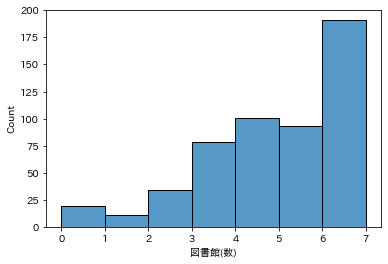

In [43]:
sns.histplot(df_tokyo_district_master['Âõ≥Êõ∏È§®(Êï∞)'], bins=7)

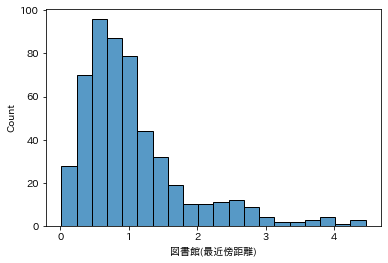

In [46]:
sns.histplot(df_tokyo_district_master['Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)'], bins=20)

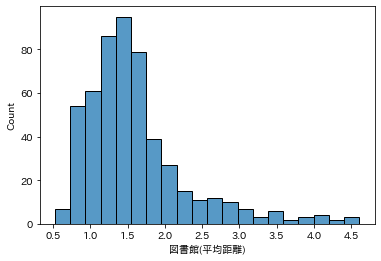

In [47]:
sns.histplot(df_tokyo_district_master['Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)'], bins=20)

In [83]:
def norm_base(sr_data, ascending=True):
    norm = (sr_data - sr_data.mean())/sr_data.std()
    if not ascending:
       norm = -norm
    return norm

def normalization(sr_data, ascending=True, max_val=5, std=1):
    norm = norm_base(sr_data, ascending)
    val = ((norm * std) + max_val/2)
    val[val > max_val] = max_val
    val[val < 0] = 0
    return val

def normalization_2(df_data, columns=('col_1', 'col_2'), ascending=(True, True), weight=(1, 1), offset=0, max_val=5, std=1):
    count = len(columns)
    norm_sum = 0
    for i in range(count):
        norm_sum += norm_base(df_data[columns[i]], ascending[i]) * weight[i]
    norm = norm_base(norm_sum)
    val = (norm * std) + max_val/2 + offset
    val[val > max_val] = max_val
    val[val < 0] = 0
    return val

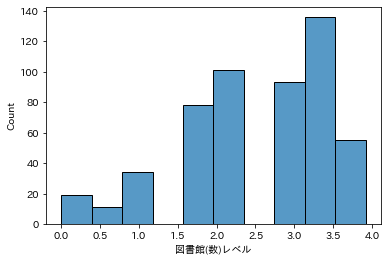

In [65]:
df_tokyo_district_master['Âõ≥Êõ∏È§®(Êï∞)„É¨„Éô„É´'] = normalization(df_tokyo_district_master['Âõ≥Êõ∏È§®(Êï∞)'])
sns.histplot(df_tokyo_district_master['Âõ≥Êõ∏È§®(Êï∞)„É¨„Éô„É´'], bins=10)

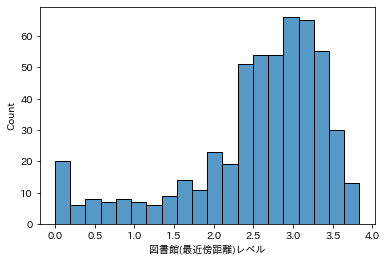

In [66]:
df_tokyo_district_master['Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)„É¨„Éô„É´'] = normalization(df_tokyo_district_master['Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)'], ascending=False)


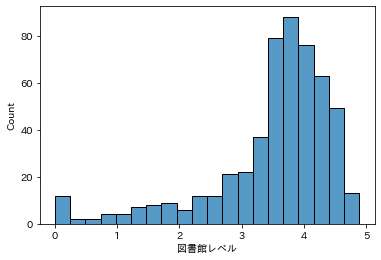

In [84]:
df_tokyo_district_master['Âõ≥Êõ∏È§®„É¨„Éô„É´'] = normalization_2(
    df_tokyo_district_master, 
    columns=('Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)', 'Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)', 'Âõ≥Êõ∏È§®(Êï∞)'),
    ascending=(False, False, True),
    weight=(1, 0.7, 0.5),
    offset=1
)

sns.histplot(df_tokyo_district_master['Âõ≥Êõ∏È§®„É¨„Éô„É´'], bins=20)

In [104]:
df_library_level = df_tokyo_district_master.copy()
df_library_level['rank'] = df_library_level.groupby('Áî∫Âêç')['Âõ≥Êõ∏È§®„É¨„Éô„É´'].transform('rank', ascending=False)
df_library_level = df_library_level[df_library_level['rank'] == 1].sort_values('Âõ≥Êõ∏È§®„É¨„Éô„É´', ascending=False)[
    ['Â∏ÇÂå∫Áî∫Êùë', 'Áî∫Âêç', 'Áî∫‰∏ÅÁõÆ', 'Âõ≥Êõ∏È§®„É¨„Éô„É´', 'Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)', 'Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)', 'Âõ≥Êõ∏È§®(Êï∞)']
].reset_index(drop=True)
print(df_library_level.shape)

(131, 7)


In [107]:
df_library_level.head(30)

Â∏ÇÂå∫Áî∫Êùë     Áî∫Âêç      Áî∫‰∏ÅÁõÆ    Âõ≥Êõ∏È§®„É¨„Éô„É´  Âõ≥Êõ∏È§®(ÊúÄËøëÂÇçË∑ùÈõ¢)  Âõ≥Êõ∏È§®(Âπ≥ÂùáË∑ùÈõ¢)  Âõ≥Êõ∏È§®(Êï∞)
0   Â¢®Áî∞Âå∫     ‰∫¨Â≥∂    ‰∫¨Â≥∂‰∏Ä‰∏ÅÁõÆ  4.890821    0.017763   0.793960       7
1    Ê∏ØÂå∫   È∫ªÂ∏ÉÂçÅÁï™  È∫ªÂ∏ÉÂçÅÁï™‰∏Ä‰∏ÅÁõÆ  4.773513    0.092055   0.939395       7
2    Ê∏ØÂå∫     È´òËº™    È´òËº™‰∏Ä‰∏ÅÁõÆ  4.758420    0.215805   0.525269       6
3   Â¢®Áî∞Âå∫     ÂÖ´Â∫É    ÂÖ´Â∫É‰∫î‰∏ÅÁõÆ  4.737723    0.012370   0.828442       6
4   Â¢®Áî∞Âå∫     Ê®™Â∑ù    Ê®™Â∑ù‰∫î‰∏ÅÁõÆ  4.719197    0.071284   0.790943       6
5    Ê∏ØÂå∫    Êù±È∫ªÂ∏É   Êù±È∫ªÂ∏É‰∏â‰∏ÅÁõÆ  4.711028    0.247635   0.868194       7
6    Ê∏ØÂå∫    ËäùÂÖ¨Âúí   ËäùÂÖ¨Âúí‰∏â‰∏ÅÁõÆ  4.696967    0.226995   0.923489       7
7    Ê∏ØÂå∫     ÁôΩÈáë    ÁôΩÈáë‰∫å‰∏ÅÁõÆ  4.682272    0.239584   0.651006       6
8   Â¢®Áî∞Âå∫     Êú¨ÊâÄ    Êú¨ÊâÄÂõõ‰∏ÅÁõÆ  4.658478    0.201899   0.748110       6
9   Â¢®Áî∞Âå∫     Ê•≠Âπ≥    Ê•≠Âπ≥‰∫î‰∏ÅÁõÆ  4.620399    0.263653   0.747084       6
10   Ê∏ØÂå∫      Ëäù     Ëäù‰∫î‰∏ÅÁõÆ  4.614806    0.159900   0.891524       6
11   Ê∏ØÂå∫     ‰∏âÁî∞    ‰∏âÁî∞‰∫å‰∏ÅÁõÆ  4.613637    0.437871   0.824182       7
12  Â¢®Áî∞Âå∫    Êù±ÂêëÂ≥∂   Êù±ÂêëÂ≥∂‰∫å‰∏ÅÁõÆ  4.603371    0.335552   0.976368       7
13  Â¢®Áî∞Âå∫    Êù±ÈßíÂΩ¢   Êù±ÈßíÂΩ¢Âõõ‰∏ÅÁõÆ  4.600941    0.205009   0.862157       6
14   Ê∏ØÂå∫  È∫ªÂ∏ÉÊ∞∏ÂùÇÁî∫    È∫ªÂ∏ÉÊ∞∏ÂùÇÁî∫  4.556316    0.225277   0.927724       6
15   Ê∏ØÂå∫    ÂçóÈ∫ªÂ∏É   ÂçóÈ∫ªÂ∏É‰∫å‰∏ÅÁõÆ  4.508953    0.663260   0.750082       7
16  Â¢®Áî∞Âå∫     Êäº‰∏ä    Êäº‰∏ä‰∏â‰∏ÅÁõÆ  4.496017    0.581649   0.881207       7
17   Ê∏ØÂå∫    ÂÖÉÈ∫ªÂ∏É   ÂÖÉÈ∫ªÂ∏É‰∏Ä‰∏ÅÁõÆ  4.492487    0.469701   1.031915       7
18  Â¢®Áî∞Âå∫     ÊñáËä±    ÊñáËä±‰∏Ä‰∏ÅÁõÆ  4.488075    0.583335   0.895339       7
19   Ê∏ØÂå∫     Ê∏ØÂçó    Ê∏ØÂçó‰∏â‰∏ÅÁõÆ  4.487552    0.150165   1.165046       6
20   Ê∏ØÂå∫    È∫ªÂ∏ÉÂè∞   È∫ªÂ∏ÉÂè∞‰∫å‰∏ÅÁõÆ  4.479389    0.607757   0.881860       7
21   Ê∏ØÂå∫  È∫ªÂ∏ÉÁã∏Á©¥Áî∫    È∫ªÂ∏ÉÁã∏Á©¥Áî∫  4.477461    0.362658   0.913426       6
22  Á∑¥È¶¨Âå∫   Áü≥Á•û‰∫ïÁî∫  Áü≥Á•û‰∫ïÁî∫‰∫î‰∏ÅÁõÆ  4.473523    0.344771   1.230922       7
23  Á∑¥È¶¨Âå∫    Êò•Êó•Áî∫   Êò•Êó•Áî∫ÂÖ≠‰∏ÅÁõÆ  4.470598    0.420371   1.140039       7
24  Â¢®Áî∞Âå∫     Â§™Âπ≥    Â§™Âπ≥Âõõ‰∏ÅÁõÆ  4.453744    0.360340   0.965049       6
25   Ê∏ØÂå∫    ËäùÂ§ßÈñÄ   ËäùÂ§ßÈñÄ‰∏Ä‰∏ÅÁõÆ  4.450999    0.404052   1.201157       7
26   Ê∏ØÂå∫    ÂÖ≠Êú¨Êú®   ÂÖ≠Êú¨Êú®‰∫î‰∏ÅÁõÆ  4.445412    0.294189   1.066918       6
27   Ê∏ØÂå∫     ËäùÊµ¶    ËäùÊµ¶‰∏â‰∏ÅÁõÆ  4.412737    0.428902   0.961305       6
28  Â¢®Áî∞Âå∫     Á´ãËä±    Á´ãËä±‰∫î‰∏ÅÁõÆ  4.405018    0.421821   0.986214       6
29  Â¢®Áî∞Âå∫     ÂêëÂ≥∂    ÂêëÂ≥∂Âõõ‰∏ÅÁõÆ  4.402157    0.614415   1.031760       7